# 1. データ準備

In [1]:
import glob
import os
import pandas as pd
import japanize_matplotlib


In [2]:
# ファイル名取り出し
file_names = []
for f in glob.glob('input/*.csv'):
    file_names.append(os.path.split(f)[1])
file_names


['input1.csv', 'input2.csv']

In [3]:
# データ読み込み
def read_data():
    years = []
    for i in file_names:
        # # 複数ヘッダのまま読み込み
        # df_head = pd.read_csv('input/' + i, encoding="SHIFT-JIS", header=[0,1,2])
        # years.append(df)

        # ヘッダ読み込み
        temp = pd.read_csv('input2/' + i, header=None, nrows=3)
        temp = temp.fillna('')
        header = temp.iloc[0] + '_[' + temp.iloc[1] + ']_' + temp.iloc[2]
        header = header.tolist()
        # '_[]_'を削除
        temp = []
        for j in header:
            if '_[]_' in j:
                j = j.replace('_[]_', '')
            temp.append(j)
        header = temp
        
        # データ読み込み
        df = pd.read_csv('input2/' + i, header=None, skiprows=3)
        df.columns = header

        # 結合
        years.append(df)
        df_concat = pd.concat(years, axis=1)
        
    return df_concat

df = read_data()
df.head()

,date,time,1_[input1]_cat1,2_[input1]_cat2,3_[input1]_num1,4_[input1]_num2,date,time,5_[input2]_cat3,6_[input2]_cat4,7_[input2]_num3,8_[input2]_num4
0,2001/3/31,00:00:00,A,A-1,11,10.1,2001/3/31,00:00:00,A,A-1,11,10.1
1,2001/9/30,00:00:00,A,A-1,31,30.1,2001/9/30,00:00:00,A,A-1,31,30.1
2,2002/3/31,00:00:00,A,A-1,11,10.1,2002/3/31,00:00:00,A,A-1,11,10.1
3,2002/9/30,00:00:00,A,A-1,31,30.1,2002/9/30,00:00:00,A,A-1,31,30.1
4,2003/3/31,00:00:00,A,A-1,11,10.1,2003/3/31,00:00:00,A,A-1,11,10.1


In [4]:
# 重複列を削除
df = df.loc[:,~df.columns.duplicated()]
df.head()

,date,time,1_[input1]_cat1,2_[input1]_cat2,3_[input1]_num1,4_[input1]_num2,5_[input2]_cat3,6_[input2]_cat4,7_[input2]_num3,8_[input2]_num4
0,2001/3/31,00:00:00,A,A-1,11,10.1,A,A-1,11,10.1
1,2001/9/30,00:00:00,A,A-1,31,30.1,A,A-1,31,30.1
2,2002/3/31,00:00:00,A,A-1,11,10.1,A,A-1,11,10.1
3,2002/9/30,00:00:00,A,A-1,31,30.1,A,A-1,31,30.1
4,2003/3/31,00:00:00,A,A-1,11,10.1,A,A-1,11,10.1


In [5]:
# 列結合
df['datetime'] = df['date'] + 'T' + df['time']
df = df.drop(columns=['date', 'time'])
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,1_[input1]_cat1,2_[input1]_cat2,3_[input1]_num1,4_[input1]_num2,5_[input2]_cat3,6_[input2]_cat4,7_[input2]_num3,8_[input2]_num4,datetime
0,A,A-1,11,10.1,A,A-1,11,10.1,2001-03-31
1,A,A-1,31,30.1,A,A-1,31,30.1,2001-09-30
2,A,A-1,11,10.1,A,A-1,11,10.1,2002-03-31
3,A,A-1,31,30.1,A,A-1,31,30.1,2002-09-30
4,A,A-1,11,10.1,A,A-1,11,10.1,2003-03-31


In [6]:
df.dtypes

1_[input1]_cat1            object
2_[input1]_cat2            object
3_[input1]_num1             int64
4_[input1]_num2           float64
5_[input2]_cat3            object
6_[input2]_cat4            object
7_[input2]_num3             int64
8_[input2]_num4           float64
datetime           datetime64[ns]
dtype: object

# 2. とりあえず描画

In [7]:
dfa = df
dfa = dfa.set_index('datetime')
dfa.dtypes

1_[input1]_cat1     object
2_[input1]_cat2     object
3_[input1]_num1      int64
4_[input1]_num2    float64
5_[input2]_cat3     object
6_[input2]_cat4     object
7_[input2]_num3      int64
8_[input2]_num4    float64
dtype: object

In [8]:
dfa.head()

,1_[input1]_cat1,2_[input1]_cat2,3_[input1]_num1,4_[input1]_num2,5_[input2]_cat3,6_[input2]_cat4,7_[input2]_num3,8_[input2]_num4
datetime,,,,,,,,
2001-03-31,A,A-1,11,10.1,A,A-1,11,10.1
2001-09-30,A,A-1,31,30.1,A,A-1,31,30.1
2002-03-31,A,A-1,11,10.1,A,A-1,11,10.1
2002-09-30,A,A-1,31,30.1,A,A-1,31,30.1
2003-03-31,A,A-1,11,10.1,A,A-1,11,10.1



Bad key savefig.frameon in file c:\users\neko9\desk\dev\.venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file c:\users\neko9\desk\dev\.venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file c:\users\neko9\desk\dev\.venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated m

Text(0, 0.5, 'y_name')

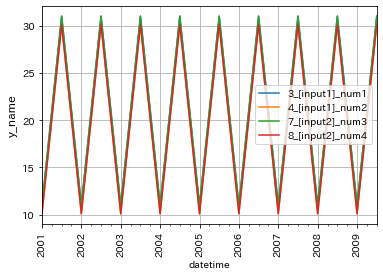

In [9]:
import matplotlib.pyplot as plt
dfa.plot(grid=True, linestyle='-', rot=90)
plt.ylabel('y_name',size=12)  #Y軸指定
# dfa.plot(grid=True, which='minor', linestyle='-', linewidth=0.25)

#(data, x, y, kind, ax, subplots, sharex, sharey, layout, figsize, use_index, title, grid, legend, style, 
#logx, logy, loglog, xticks, yticks, xlim, ylim, rot, fontsize, colormap, table, yerr, xerr, secondary_y, 
#sort_columns, **kwds)


# (self, xdata, ydata, linewidth, linestyle, color, marker, markersize, markeredgewidth, 
# markeredgecolor, markerfacecolor, markerfacecoloralt, fillstyle, antialiased, dash_capstyle, 
# solid_capstyle, dash_joinstyle, solid_joinstyle, pickradius, drawstyle, markevery, **kwargs)


# 3. pltで描画

    datetime 1_[input1]_cat1 2_[input1]_cat2  3_[input1]_num1  \
0 2001-03-31               A             A-1               11   

   4_[input1]_num2 5_[input2]_cat3 6_[input2]_cat4  7_[input2]_num3  \
0             10.1               A             A-1               11   

   8_[input2]_num4  
0             10.1  


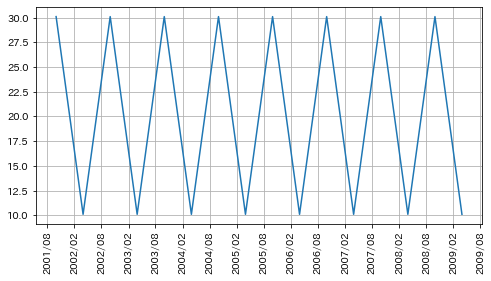

In [10]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dfb = dfa.reset_index()
print(dfb.head(1))

# データフレームの準備
start_datetime = datetime.datetime(2001, 3,31)
end_datetime = datetime.datetime(2009, 9,30)
# start_datetime = datetime.datetime(2016, 1,28)
# end_datetime = datetime.datetime(2016, 12,31)
target_df = dfb[(dfb["datetime"] > start_datetime)&(dfb["datetime"] < end_datetime)]

# 描画
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(target_df["datetime"], target_df["8_[input2]_num4"])

# 軸目盛の設定
# ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=31, tz=None))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=6, tz=None))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

## 補助目盛りを使いたい場合や時刻まで表示したい場合は以下を調整して使用
# ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1), tz=None))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S"))

# 軸目盛ラベルの回転
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=10);

ax.grid(True)


No handles with labels found to put in legend.


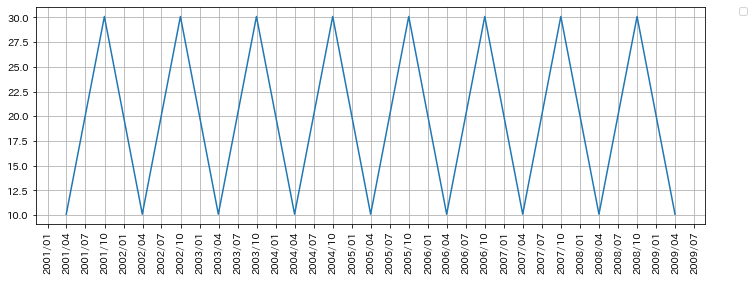

In [11]:
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def show_df_datetime(df):
    df = df.reset_index()

    # 開始、終了を取得
    dt = df['datetime']
    dt_start = dt.iloc[0]
    dt_end = dt.iloc[-1]
    dt_start = dt_start - timedelta(days=1)
    
    # データフレームの準備
    start_datetime = dt_start  #datetime.datetime(2001,3,30)
    end_datetime = dt_end  #datetime.datetime(2009,9,30)
    target_df = df[(df["datetime"] > start_datetime)&(df["datetime"] < end_datetime)]

    # 描画
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(target_df["datetime"], target_df["8_[input2]_num4"])

    # 軸目盛の設定
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=3, tz=None))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))

    # 軸目盛ラベルの回転
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10);
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
dfc = dfa.reset_index()
show_df_datetime(dfa)
# print(dfc.head(1))


# 3. plt関数化（日本語化など含む）

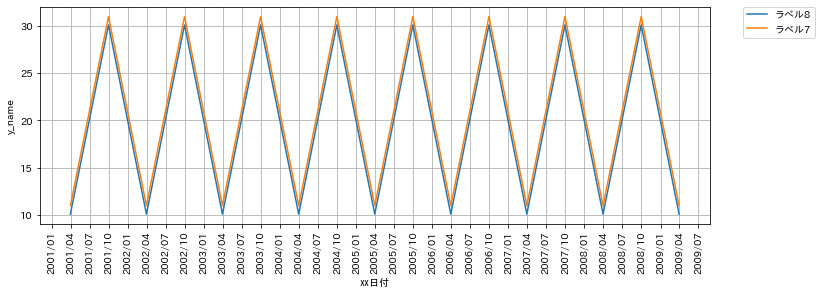

In [12]:
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# # plt.rcParams['font.sans-serif'] = 'Yu Mincho'
# from matplotlib import rcParams
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']


def show_df_datetime(df):
    df = df.reset_index()

    # 開始、終了を取得
    dt = df['datetime']
    dt_start = dt.iloc[0]
    dt_end = dt.iloc[-1]
    dt_start = dt_start - timedelta(days=1)
    
    # データフレームの準備
    start_datetime = dt_start  #datetime.datetime(2001,3,30)
    end_datetime = dt_end  #datetime.datetime(2009,9,30)
    target_df = df[(df["datetime"] > start_datetime)&(df["datetime"] < end_datetime)]

    # 描画
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(target_df["datetime"], target_df["8_[input2]_num4"],label='ラべル8')
    ax.plot(target_df["datetime"], target_df["7_[input2]_num3"],label='ラベル7')

    # 軸目盛の設定
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=3, tz=None))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))

    # 軸目盛ラベルの回転
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10);
    ax.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlabel('xx日付', fontname="MS Gothic")  #Y軸指定
    plt.ylabel('y_name')  #Y軸指定

    
show_df_datetime(dfa)
# print(dfc.head(1))


In [13]:
#以下、失敗。
# IPAexゴシック(Ver.002.01)をダウンロード
# 解凍してできたipaexg.ttfを \site-packages\matplotlib\mpl-data\fonts\ttf以下にコピー


#おそらく以下で成功。
# pip install --upgrade matplotlib

# 4. テキスト入力

In [14]:
from ipywidgets import interact, Select

In [15]:
@interact(mode1='A01', mode2='B01', save=True)
def f(mode1, mode2, save):
    print(mode1)
    show_df_datetime(dfa)

interactive(children=(Text(value='A01', description='mode1'), Text(value='B01', description='mode2'), Checkbox…